In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as random

In [2]:
N = 1000 #Population size
network = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,i):
        if random.random() <= 0.5:
            network[i][j] = 1 #represents that node i is connected to node j (and viceversa)
            network[j][i] = 1
        
#Now that we have the population size, we can assign a position in space to each individual.
#Assuming that we depict the space as a rectangular lattice of size L, we can assign the individuals within it random positions.
L = 10000
positions = [] #As we labeled each individual with a number (from 0 to N-1), we can make a list with the position of each one.
positions.append([round(random.random()*100),round(random.random()*100)])
for ind in range(0,N): #Checks that each position is unique 
    pos_aux = [round(random.random()*100),round(random.random()*100)]
    rep = True
    while rep == True:
        free_spot = True
        for pos in positions:
            if pos_aux == pos:
                free_spot = False
        if free_spot == True:
            rep = False
        else:
            pos_aux = [round(random.random()*100),round(random.random()*100)]

    positions.append(pos_aux)

In [5]:
#Lets cut-off those connections which exceed certain threshold distance. 
#We can add a cutoff probability, which allows certain "long-range" connections despite the threshold.
p_cutoff = 0.9
for i in range(0,N):
    for j in range(0,N):
        if network[i][j] == 1:
            pos_i = positions[i]
            pos_j = positions[j]
            d = ((pos_i[0]-pos_j[0])**2+(pos_i[1]-pos_j[1])**2)**(1/2)
            if d > 20 and random.random() < p_cutoff:
                network[i][j] = 0
                network[j][i] = 0

In [148]:
#To apply the SIR model, we can make a list of susceptibles, infectious and recovered.
I0 = 2 #Initial number of infected people.
beta = 0.01 #Transmission rate
nu = 0.01 #Recovery rate
chi = 0.01 #R->S rate
indexes = []
for i in range(0,N):
    indexes.append(i)
I = random.sample(indexes, I0) #Picks I0 initial susceptibles at random and makes them infectious
R = []
S = indexes
for i in I:
    S.remove(i)
I_t = []
R_t = []
S_t = []
I_t.append(I0)
R_t.append(0)
S_t.append(N-I0)

In [149]:
max_step = 1000
for step in range(0,max_step):
    for s in S:
        for i in I:
            if network[s][i] == 1: #If infectious and susceptible are in contact
                if random.random() < beta:
                    S.remove(s)
                    I.append(s)
                    break
    for r in R:
        if random.random() < chi: #Chance to loose immunity
            R.remove(r)
            S.append(r)
    for i in I:
        if random.random() < nu: #If infectious gets healed
            I.remove(i)
            R.append(i)
    R_t.append(len(R))
    I_t.append(len(I))
    S_t.append(len(S))

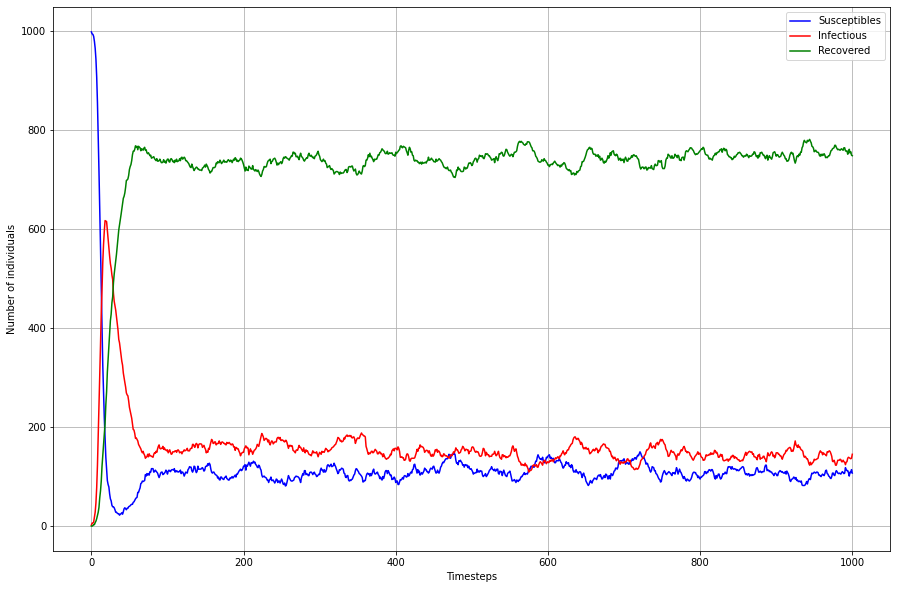

In [150]:
#Plots the dinamics of the epidemic
figure = plt.figure(figsize=(15,10))
plt.plot(S_t,'blue', label = 'Susceptibles')
plt.plot(I_t,'red', label = 'Infectious')
plt.plot(R_t,'green', label = 'Recovered')
plt.xlabel('Timesteps')
plt.ylabel('Number of individuals')
plt.legend(loc = 'best')
plt.grid()
plt.show()